In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ev-bettery/Final Database.csv
/kaggle/input/checklist/HNEI_b_features.csv


In [2]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/ev-bettery/Final Database.csv'  # Update this path to your actual file location
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Unnamed: 0,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),Total time (s),RUL
0,0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,14648.45,1112
1,1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,19124.28,1111
2,2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,19029.51,1110
3,3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,18923.65,1109
4,4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,104171.80,1107


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


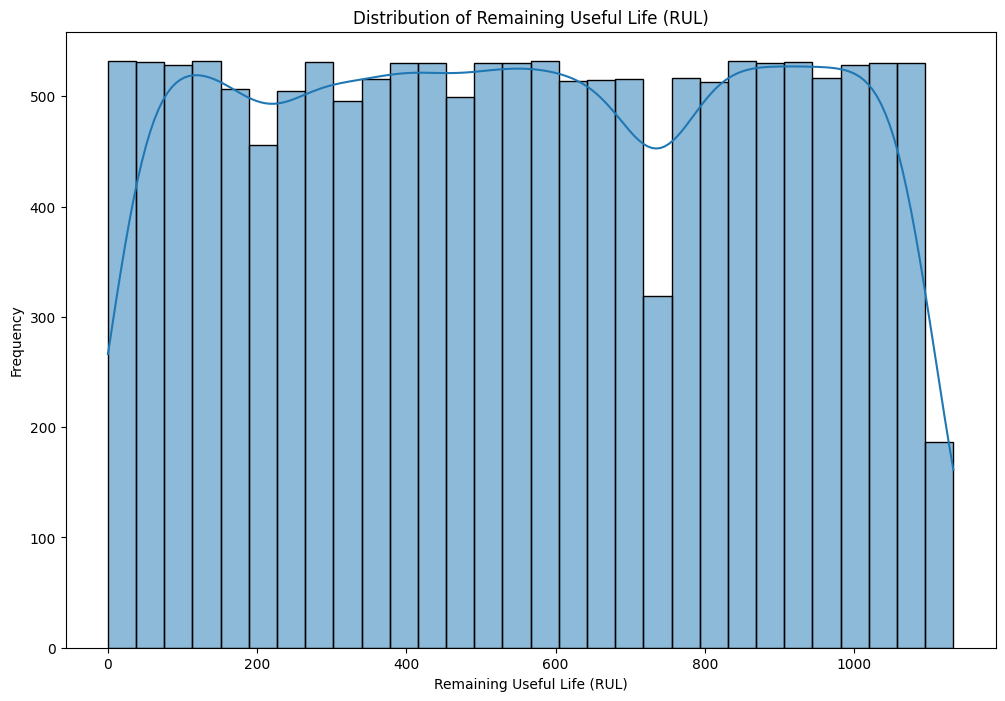

In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# Basic statistics
statistics = data.describe()

# Visualizing distributions
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.histplot(data['RUL'], bins=30, kde=True)
plt.title('Distribution of Remaining Useful Life (RUL)')
plt.xlabel('Remaining Useful Life (RUL)')
plt.ylabel('Frequency')
plt.show()


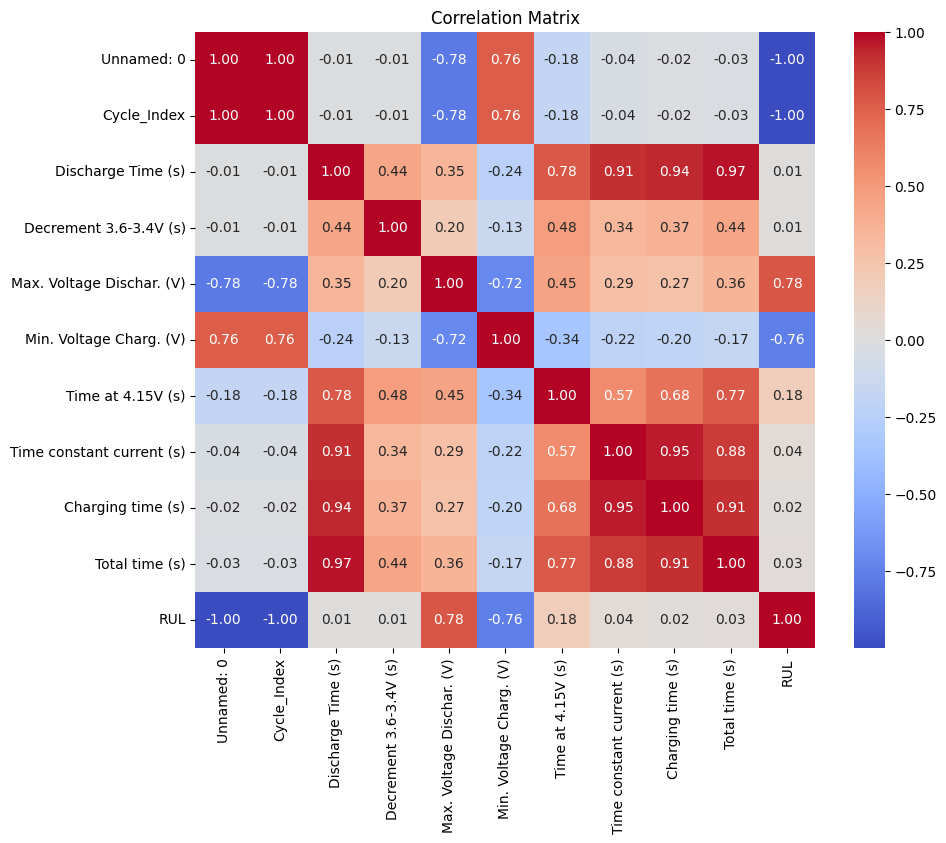

In [4]:
# Correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Splitting the data
X = data.drop('RUL', axis=1)
y = data['RUL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Mean Squared Error: 16.54


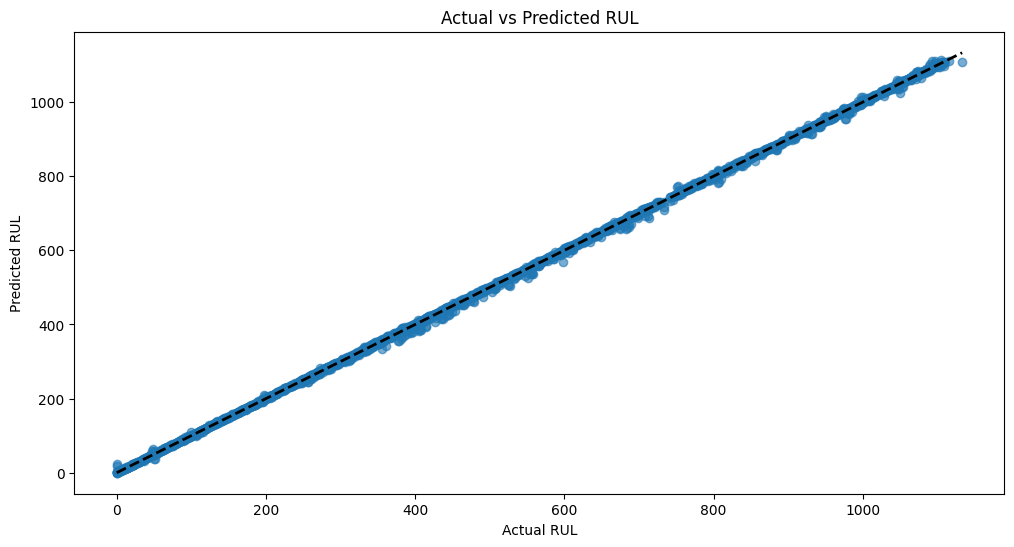

In [6]:
# Predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Visualizing predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL')
plt.show()


In [7]:
import numpy as np

# Creating random input data
random_inputs = np.random.rand(5, X.shape[1]) * X.max().values
random_df = pd.DataFrame(random_inputs, columns=X.columns)

# Predicting RUL for random inputs
predicted_rul = model.predict(random_df)
print("Predicted RUL for random inputs:")
print(predicted_rul)


Predicted RUL for random inputs:
[905.14 485.01 889.76 976.21 340.91]


/tmp/ipykernel_30/1624446035.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


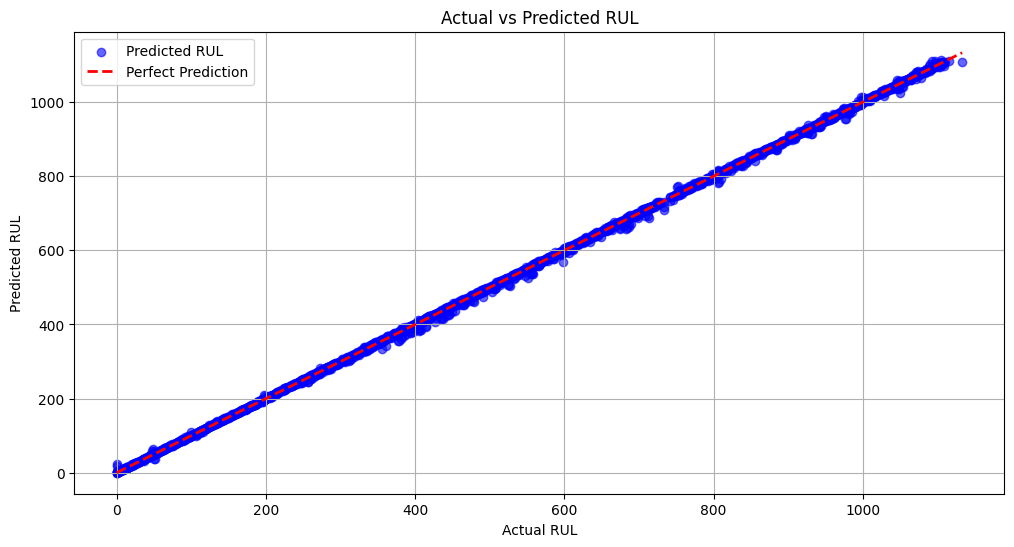

In [8]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot of Actual vs Predicted RUL
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted RUL')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL')
plt.legend()
plt.grid()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


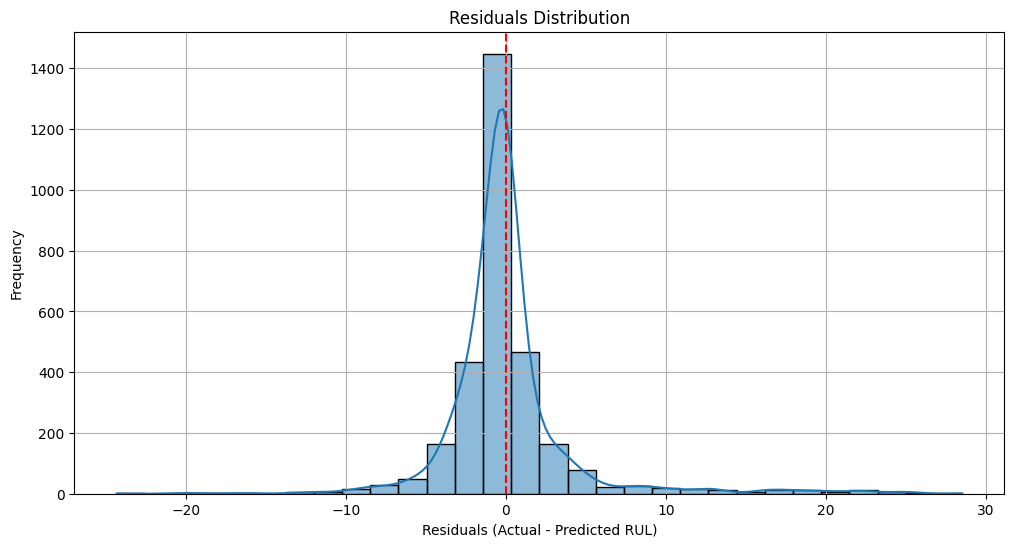

In [9]:
# Residuals Plot
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted RUL)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


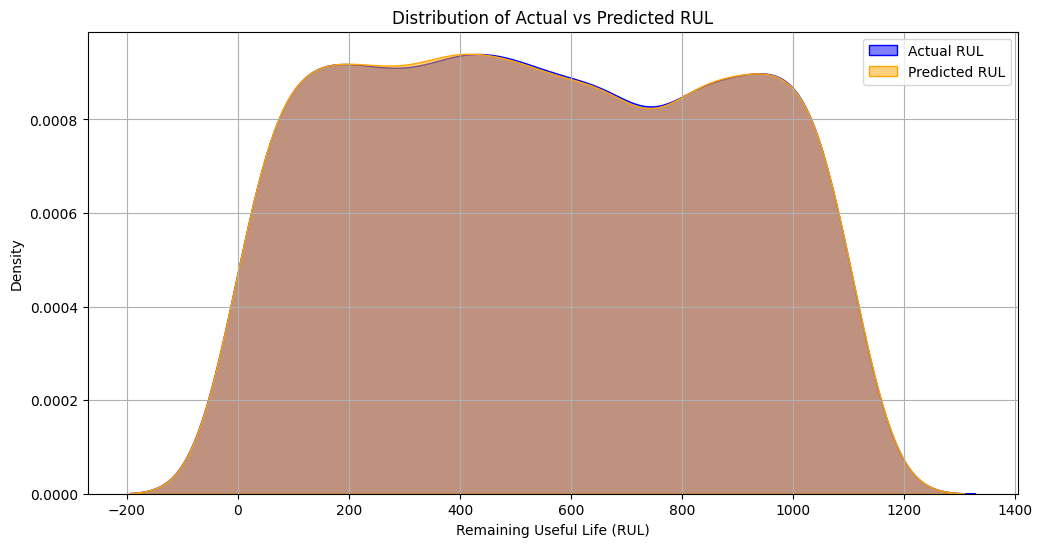

In [10]:
# Distribution of Actual and Predicted RUL
plt.figure(figsize=(12, 6))
sns.kdeplot(y_test, color='blue', label='Actual RUL', fill=True, alpha=0.5)
sns.kdeplot(y_pred, color='orange', label='Predicted RUL', fill=True, alpha=0.5)
plt.title('Distribution of Actual vs Predicted RUL')
plt.xlabel('Remaining Useful Life (RUL)')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


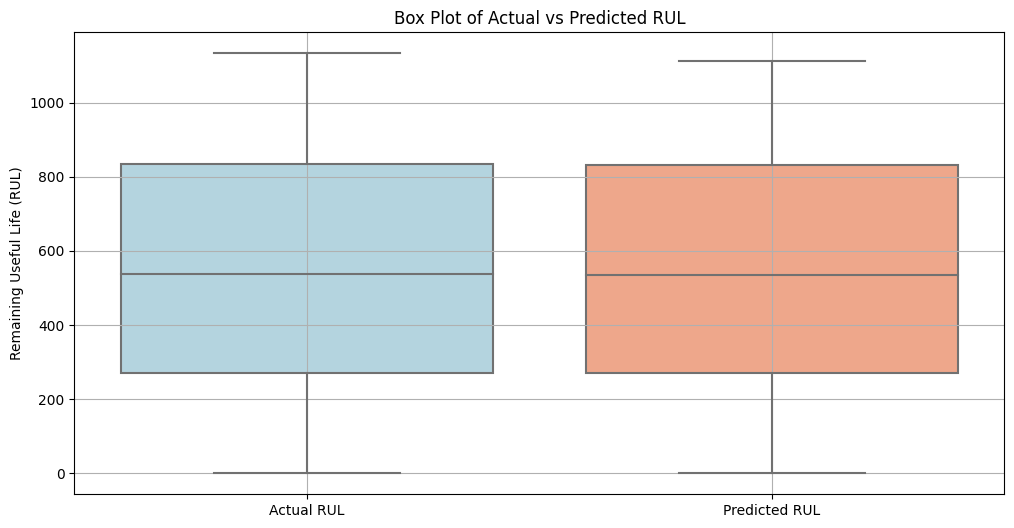

In [11]:
# Box Plot of Actual vs. Predicted RUL
plt.figure(figsize=(12, 6))
sns.boxplot(data=[y_test, y_pred], palette=["lightblue", "#FFA07A"])  # Use hex code for light orange
plt.xticks([0, 1], ['Actual RUL', 'Predicted RUL'])
plt.title('Box Plot of Actual vs Predicted RUL')
plt.ylabel('Remaining Useful Life (RUL)')
plt.grid()
plt.show()


In [12]:
import numpy as np

# Creating random input data
random_inputs = np.random.rand(5, X.shape[1]) * X.max().values
random_df = pd.DataFrame(random_inputs, columns=X.columns)

# Predicting RUL for random inputs
predicted_rul = model.predict(random_df)

# Displaying the random inputs and their predicted RUL
print("Random Inputs:\n", random_df)
print("Predicted RUL for random inputs:\n", predicted_rul)


Random Inputs:
     Unnamed: 0  Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0   440.567163   691.796660       562882.059998           188850.370374   
1   205.999349  1012.337863        25334.551571            73356.883332   
2   930.252490   330.352398       317318.215049            15112.474784   
3   694.178487  1088.384844       814118.678850           394170.812246   
4  1057.970299   360.178540       855872.074014            10322.496720   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                   1.108518                 1.087811       64085.378233   
1                   2.890795                 2.832584      174370.692688   
2                   1.123039                 3.360698      222799.133314   
3                   4.063741                 2.455569      220974.745125   
4                   3.280849                 3.826854      238271.816439   

   Time constant current (s)  Charging time (s)  Total time (s)  
0         

In [13]:
import pandas as pd

# Load the new dataset
new_file_path = '/kaggle/input/checklist/HNEI_b_features.csv'  # Update with your actual file path
new_data = pd.read_csv(new_file_path)

# Display the first few rows of the new dataset
new_data.head()


,Unnamed: 0,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),Total time (s),RUL
0,1,1.0,2604.00,1186.495500,3.666,3.213,5424.991,6706.02,10772.99,14663.71,1107
1,2,2.0,7384.99,1228.496000,4.242,3.221,5488.000,6727.01,10492.99,19099.87,1106
2,3,3.0,7364.00,1165.519000,4.244,3.225,5480.989,6720.00,10367.01,18957.25,1105
3,4,4.0,7356.99,1141.027000,4.246,3.227,5481.027,6720.00,10311.01,18885.28,1104
4,6,6.0,64974.56,1143.328667,4.288,3.389,5460.000,53233.86,56789.86,104143.90,1102


In [14]:
# Check for missing values and handle them if necessary
missing_values = new_data.isnull().sum()
print("Missing values in new data:\n", missing_values)

# Drop any irrelevant columns or fill missing values as necessary
# For example, if RUL is in the new data and we don't need it for prediction:
# new_data = new_data.drop('RUL', axis=1)


Missing values in new data:
 Unnamed: 0                   0
Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
Total time (s)               0
RUL                          0
dtype: int64


In [15]:
# Print the features (column names) of the dataset
features = new_data.columns.tolist()
print("Features in the dataset:")
print(features)

Features in the dataset:
['Unnamed: 0', 'Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)', 'Total time (s)', 'RUL']


In [16]:
# Assuming you have a list of features used for training
trained_features = ['Unnamed: 0', 'Cycle_Index','Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 
                    'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 
                    'Time at 4.15V (s)', 'Time constant current (s)', 
                    'Charging time (s)', 'Total time (s)']  # Example features

# Select only the features used in training from the new_data DataFrame
X_new = new_data[trained_features]  # Make sure not to include 'RUL' or any other target variable

# Check the shape of X_new
print("Shape of new data for prediction:", X_new.shape)

# Predict RUL for the new data
predicted_rul = model.predict(X_new)

# Add the predicted RUL to the new data for visualization
new_data['Predicted_RUL'] = predicted_rul


Shape of new data for prediction: (1079, 10)


Size of Actual RUL: 1079
Size of Predicted RUL: 1079


/tmp/ipykernel_30/4274409842.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([actual_rul.min(), actual_rul.max()], [actual_rul.min(), actual_rul.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


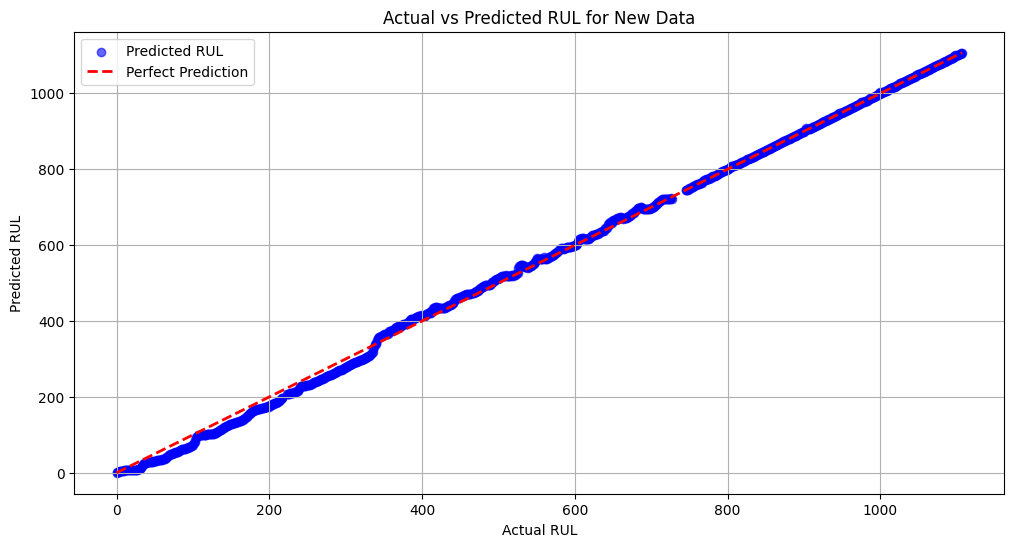

In [17]:
# Assuming 'predicted_rul' was generated as shown in previous examples

# Check the sizes of actual and predicted RUL
if 'RUL' in new_data.columns:
    actual_rul = new_data['RUL'].values  # Extract actual RUL values
    predicted_rul = new_data['Predicted_RUL'].values  # Extract predicted RUL values

    print("Size of Actual RUL:", actual_rul.size)
    print("Size of Predicted RUL:", predicted_rul.size)

    # Proceed to create the scatter plot if sizes match
    if actual_rul.size == predicted_rul.size:
        plt.figure(figsize=(12, 6))
        plt.scatter(actual_rul, predicted_rul, alpha=0.6, color='blue', label='Predicted RUL')
        plt.plot([actual_rul.min(), actual_rul.max()], [actual_rul.min(), actual_rul.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
        plt.xlabel('Actual RUL')
        plt.ylabel('Predicted RUL')
        plt.title('Actual vs Predicted RUL for New Data')
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print("The sizes of actual and predicted RUL do not match. Unable to create scatter plot.")
else:
    print("Actual RUL values are not available in the new data.")


Size of Actual RUL: 1079
Size of Predicted RUL: 1079
Mean Absolute Error (MAE): 9.334874884151992
Mean Squared Error (MSE): 164.74984754402223
Root Mean Squared Error (RMSE): 12.835491714150347
R-squared (R²): 0.9984111117807783


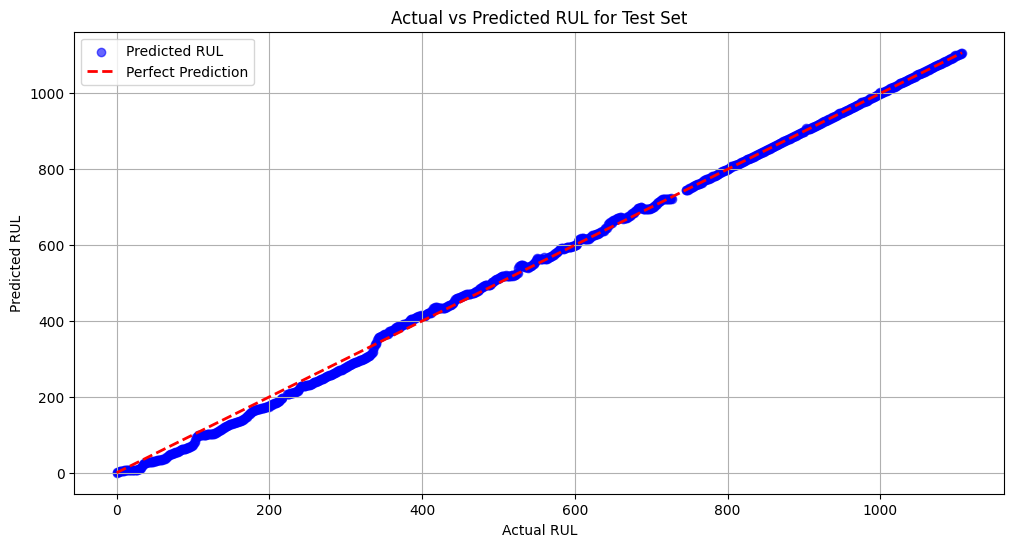

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Check if both 'RUL' (actual) and 'Predicted_RUL' are in the test data
if 'RUL' in new_data.columns and 'Predicted_RUL' in new_data.columns:
    # Extract actual and predicted RUL values
    actual_rul = new_data['RUL'].values
    predicted_rul = new_data['Predicted_RUL'].values

    # Print size of actual and predicted RUL
    print("Size of Actual RUL:", actual_rul.size)
    print("Size of Predicted RUL:", predicted_rul.size)

    # Compute evaluation metrics
    mae = mean_absolute_error(actual_rul, predicted_rul)
    mse = mean_squared_error(actual_rul, predicted_rul)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual_rul, predicted_rul)

    # Print metrics
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")

    # Step 2: Plot Actual vs Predicted RUL
    if actual_rul.size == predicted_rul.size:
        plt.figure(figsize=(12, 6))
        plt.scatter(actual_rul, predicted_rul, alpha=0.6, color='blue', label='Predicted RUL')
        plt.plot([actual_rul.min(), actual_rul.max()], [actual_rul.min(), actual_rul.max()], '--', lw=2, color='red', label='Perfect Prediction')
        plt.xlabel('Actual RUL')
        plt.ylabel('Predicted RUL')
        plt.title('Actual vs Predicted RUL for Test Set')
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print("The sizes of actual and predicted RUL do not match. Unable to create scatter plot.")
else:
    print("Actual RUL values are not available in the test data.")


Size of Actual RUL: 1079
Size of Predicted RUL: 1079
Mean Absolute Error (MAE): 9.334874884151992
Mean Squared Error (MSE): 164.74984754402223
Root Mean Squared Error (RMSE): 12.835491714150347
R-squared (R²): 0.9984111117807783
Mean Absolute Percentage Error (MAPE): 6.47%
Mean Absolute Percentage Accuracy (MAAE): 93.53%


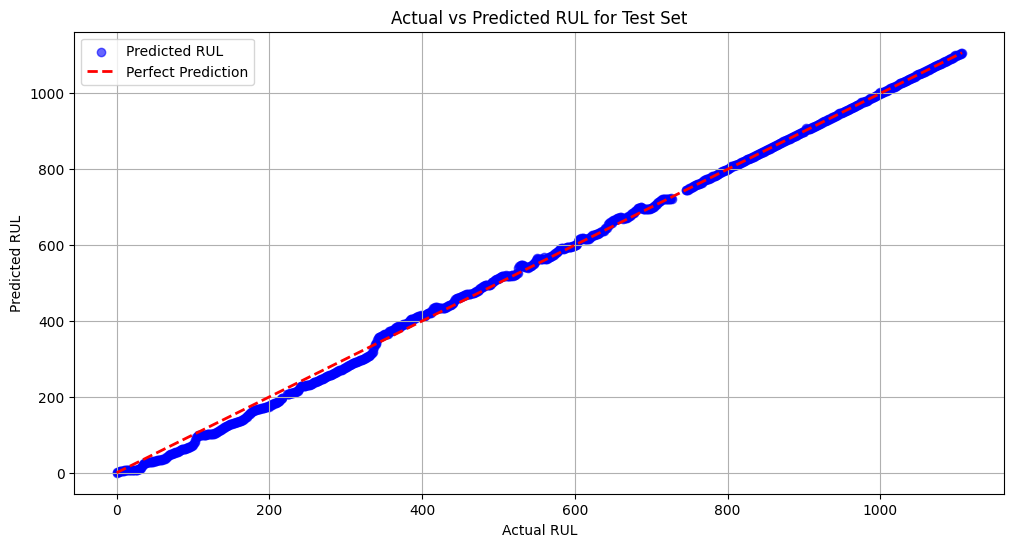

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Check if both 'RUL' (actual) and 'Predicted_RUL' are in the test data
if 'RUL' in new_data.columns and 'Predicted_RUL' in new_data.columns:
    # Extract actual and predicted RUL values
    actual_rul = new_data['RUL'].values
    predicted_rul = new_data['Predicted_RUL'].values

    # Print size of actual and predicted RUL
    print("Size of Actual RUL:", actual_rul.size)
    print("Size of Predicted RUL:", predicted_rul.size)

    # Compute evaluation metrics
    mae = mean_absolute_error(actual_rul, predicted_rul)
    mse = mean_squared_error(actual_rul, predicted_rul)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual_rul, predicted_rul)

    # Handle zero RULs for MAPE calculation (avoid division by zero)
    # Filter out zeros in actual_rul to avoid division by zero in MAPE calculation
    non_zero_mask = actual_rul != 0
    actual_rul_non_zero = actual_rul[non_zero_mask]
    predicted_rul_non_zero = predicted_rul[non_zero_mask]

    # Compute MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((actual_rul_non_zero - predicted_rul_non_zero) / actual_rul_non_zero)) * 100

    # Print metrics
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"Mean Absolute Percentage Accuracy (MAAE): {100-mape:.2f}%")

    # Step 2: Plot Actual vs Predicted RUL
    if actual_rul.size == predicted_rul.size:
        plt.figure(figsize=(12, 6))
        plt.scatter(actual_rul, predicted_rul, alpha=0.6, color='blue', label='Predicted RUL')
        plt.plot([actual_rul.min(), actual_rul.max()], [actual_rul.min(), actual_rul.max()], '--', lw=2, color='red', label='Perfect Prediction')
        plt.xlabel('Actual RUL')
        plt.ylabel('Predicted RUL')
        plt.title('Actual vs Predicted RUL for Test Set')
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print("The sizes of actual and predicted RUL do not match. Unable to create scatter plot.")
else:
    print("Actual RUL values are not available in the test data.")
